In [11]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using StaticArrays
using Statistics
using CairoMakie
using JLD

In [12]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end
Hs(x, k) = Statistics.mean(x) + k * Statistics.std(x)

Hs (generic function with 1 method)

In [13]:
function peaks(x)
    peaks_ = Float64[]
    len_ = length(x)
    for i in range(2, len_ - 1, step = 1)
        if x[i-1] < x[i] > x[i+1]
            push!(peaks_, x[i])
        end
    end
    return peaks_
end

peaks (generic function with 1 method)

In [14]:
function CALCPDF(spikes)
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(0,4,5000000)]
    pdf = ee_counter ./ length(spikes)
    return range(0,4,5000000), pdf
end

CALCPDF (generic function with 1 method)

In [15]:
tspan = (0., 500000.)

a = 1.
b = 3.
c = 1.
d = 5.
xr = -1.6
r = 0.01
s = 5.
I = 4.
xv = 2.

k1= -0.17
k2 = k1

-0.17

In [16]:
pwd()

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_0.001"

In [17]:
cd("C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_0.001")

In [18]:
pwd()

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\small_step_0.001"

In [19]:
matrix_condition = load("condition_HR_array.jld")["data"];

In [61]:
matrix_condition[:, 601]

6-element Vector{Float64}:
  0.026278713719332717
 -0.002543050769088322
  3.4282154193445593
  1.1899936596675735
 -0.9897476902868011
  3.4690069004211783

In [62]:
condition = SA[    0.026278713719332717
 -0.002543050769088322
  3.4282154193445593
  1.1899936596675735
 -0.9897476902868011
  3.4690069004211783]

6-element SVector{6, Float64} with indices SOneTo(6):
  0.026278713719332717
 -0.002543050769088322
  3.4282154193445593
  1.1899936596675735
 -0.9897476902868011
  3.4690069004211783

In [64]:
k  = 0.600
p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]

12-element SVector{12, Float64} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.6

In [65]:
prob = ODEProblem(HR, condition, tspan, p)

ODEProblem with uType SVector{6, Float64} and tType Float64. In-place: false
timespan: (0.0, 500000.0)
u0: 6-element SVector{6, Float64} with indices SOneTo(6):
  0.026278713719332717
 -0.002543050769088322
  3.4282154193445593
  1.1899936596675735
 -0.9897476902868011
  3.4690069004211783

In [66]:
sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [67]:
xsum = sol[1, :] + sol[4, :];
println("before: ", length(xsum))

xsum = xsum[floor(Int, length(xsum) / 4):end ]
println("after: ", length(xsum))

before: 6539657
after: 4904744


In [68]:
spikes = peaks(xsum);
Hs1 = Hs(spikes, 6)
length(spikes), Hs1

(23964, 7.53429012622461)

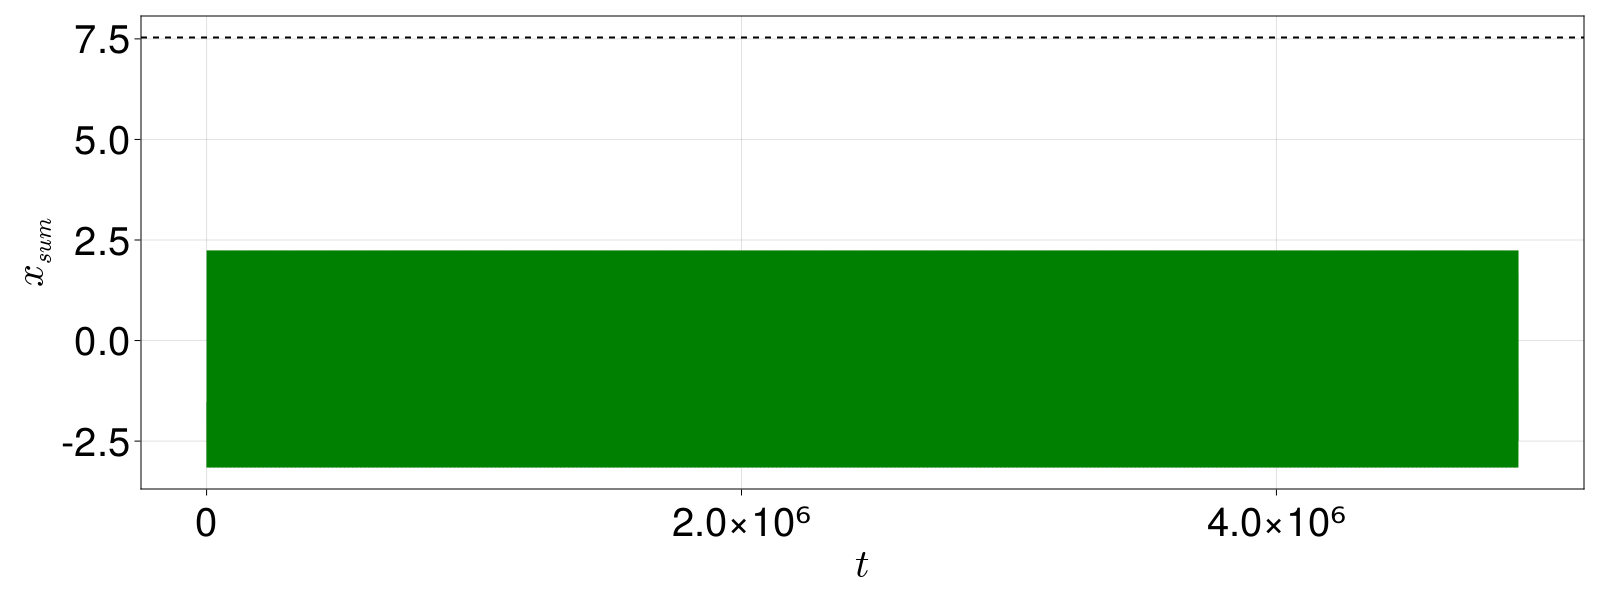

In [69]:
f = Figure(resolution = (1600, 600), fontsize = 40)
ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")

lines!(ax, xsum, linewidth = 0.5, color = "green")
# hlines!(Hs2, color = "red", linewidth = 1.0, linestyle = :dash)
hlines!(Hs1, color = "black", linewidth = 2.0, linestyle = :dash)

f

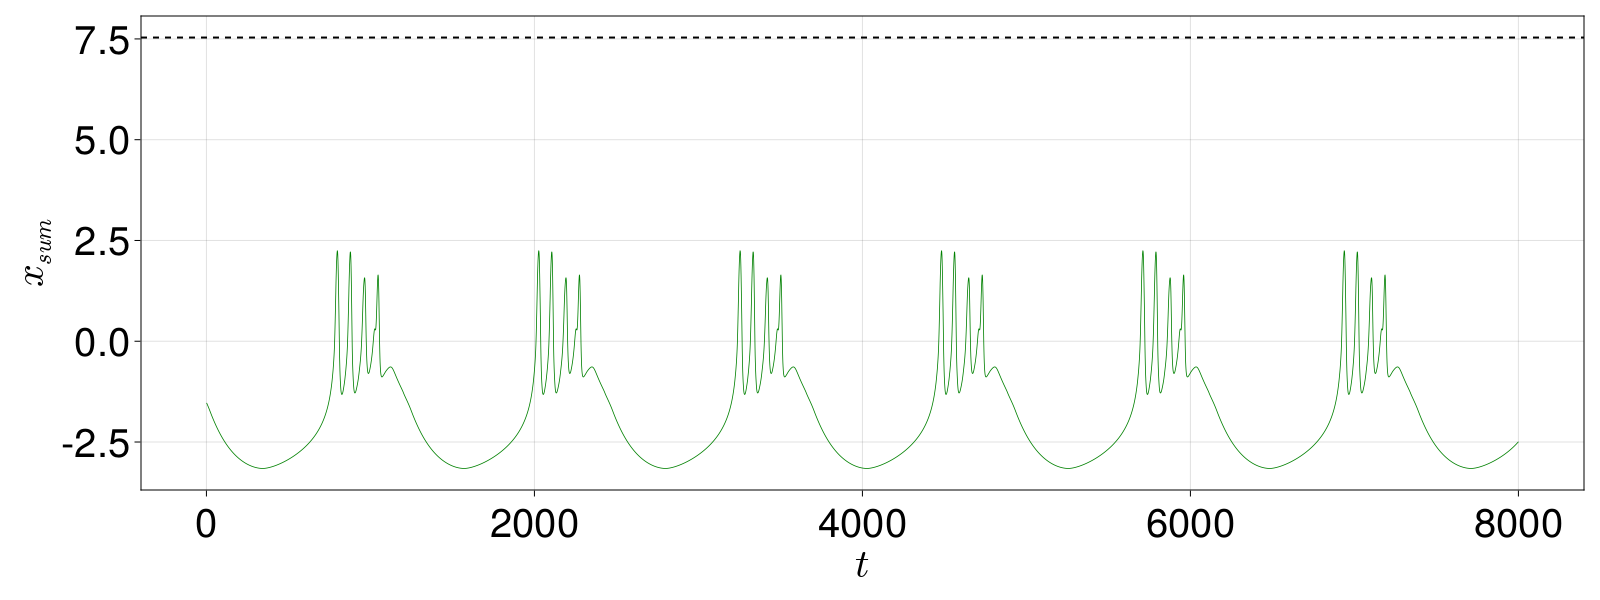

In [70]:
f = Figure(resolution = (1600, 600), fontsize = 40)
ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")
st, ed = 1, 20000
lines!(ax, xsum[1:8000], linewidth = 0.8, color = "green")

hlines!(Hs1, color = "black", linewidth = 2.0, linestyle = :dash)

f

In [71]:
sel_1, pdf_1 = CALCPDF(spikes)

(0.0:8.00000160000032e-7:4.0, [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [72]:
using PyPlot

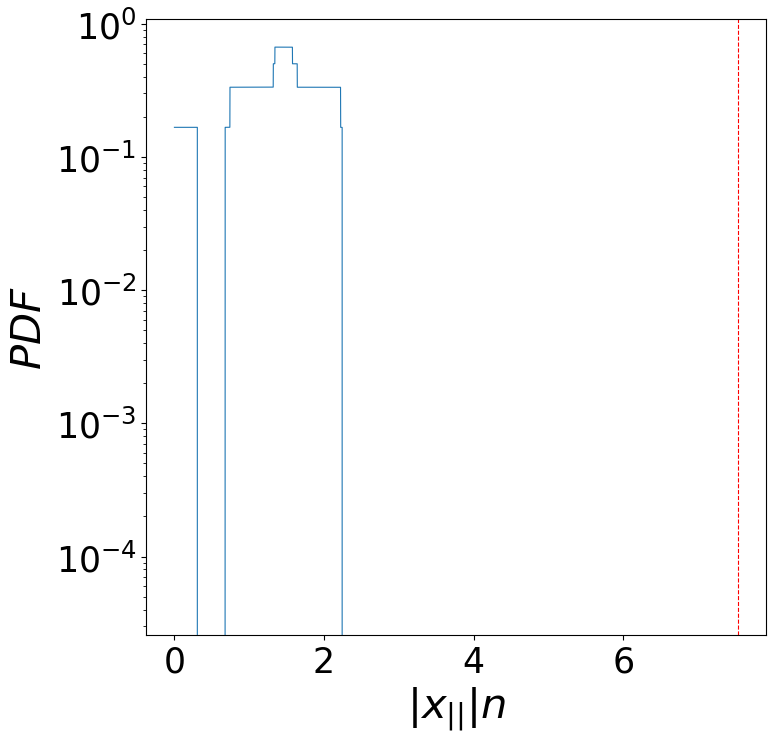

PyObject Text(50.0, 0.5, '$PDF$')

In [73]:
counts = spikes[spikes.>=Hs1]
counts = length(counts)

fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_1, pdf_1, label  = "k: $k", lw  = 0.8)
ax.axvline(Hs1, color ="red", linestyle ="--", lw = 0.8, label = "count: $counts")
ax.tick_params(labelsize = 25)
ax.set_xlabel(L"|x_{||}|n", fontsize = 30)
ax.set_ylabel(L"PDF", fontsize = 30)
# ax.legend(loc="upper left", fontsize = 25)

In [74]:
p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k];
ds = ContinuousDynamicalSystem(HR, condition, p)
    
spectrum = lyapunovspectrum(ds, 300000.0; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

6-element Vector{Float64}:
   4.265623936160655e-6
  -0.012005378704230133
  -0.031763810721665536
  -0.06127371916456911
  -8.389411039459153
 -11.033618185890864

### check strange attractor

In [75]:
cond = SA[0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
prob = ODEProblem(HR, cond, tspan, p)
sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [76]:
xsum = sol[1, :] + sol[4, :];
println("before: ", length(xsum))

xsum = xsum[floor(Int, length(xsum) / 4):end ]
println("after: ", length(xsum))

before: 5558837
after: 4169129


In [77]:
spikes = peaks(xsum);
Hs1 = Hs(spikes, 6)
length(spikes), Hs1

(12162, 4.953899129318334)

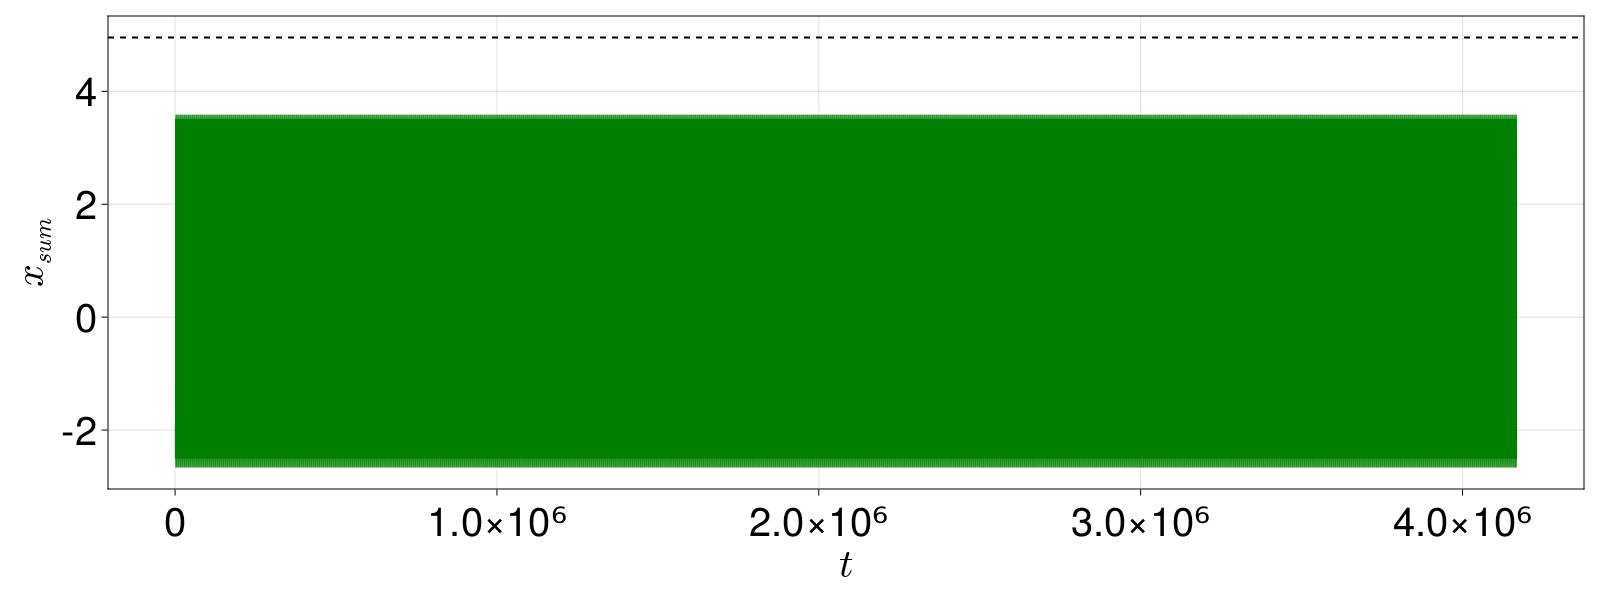

In [78]:
f = Figure(resolution = (1600, 600), fontsize = 40)
ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")

lines!(ax, xsum, linewidth = 0.5, color = "green")
# hlines!(Hs2, color = "red", linewidth = 1.0, linestyle = :dash)
hlines!(Hs1, color = "black", linewidth = 2.0, linestyle = :dash)

f

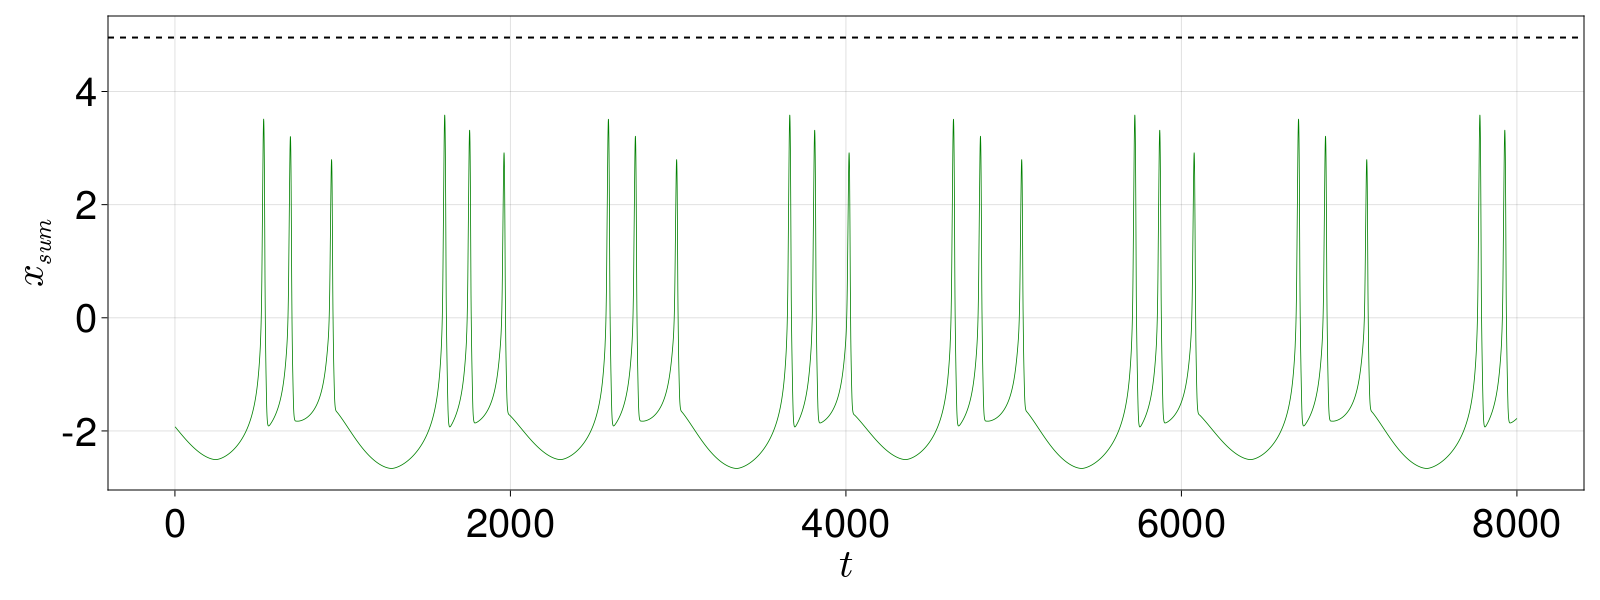

In [79]:
f = Figure(resolution = (1600, 600), fontsize = 40)
ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")
st, ed = 1, 20000
lines!(ax, xsum[1:8000], linewidth = 0.8, color = "green")

hlines!(Hs1, color = "black", linewidth = 2.0, linestyle = :dash)

f

In [80]:
sel_1, pdf_1 = CALCPDF(spikes)

(0.0:8.00000160000032e-7:4.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

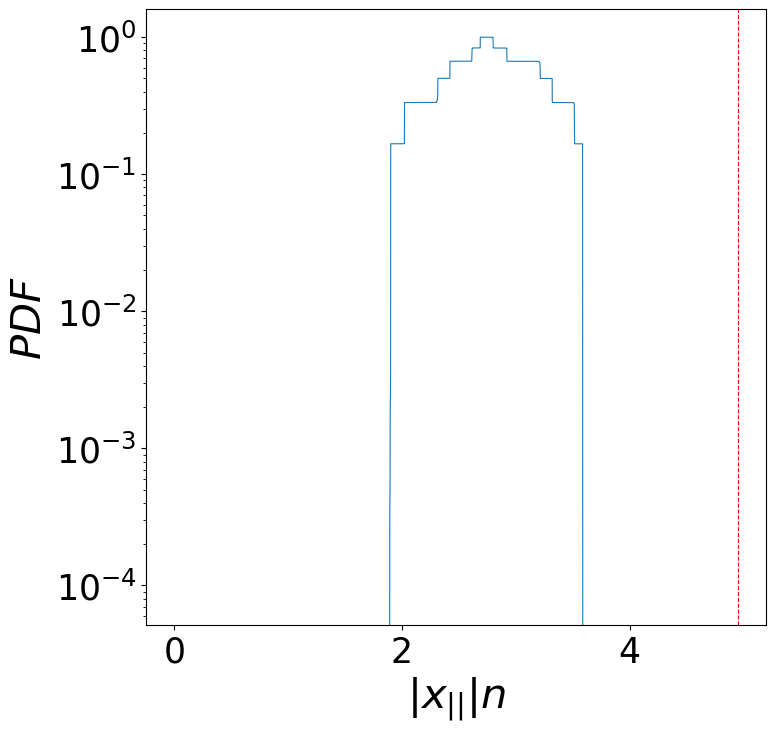

PyObject Text(50.0, 0.5, '$PDF$')

In [81]:
counts = spikes[spikes.>=Hs1]
counts = length(counts)

fig, ax = subplots(figsize = (8, 8))

ax.set_yscale("log")

ax.plot(sel_1, pdf_1, label  = "k: $k", lw  = 0.8)
ax.axvline(Hs1, color ="red", linestyle ="--", lw = 0.8, label = "count: $counts")
ax.tick_params(labelsize = 25)
ax.set_xlabel(L"|x_{||}|n", fontsize = 30)
ax.set_ylabel(L"PDF", fontsize = 30)
# ax.legend(loc="upper left", fontsize = 25)

In [82]:
p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k];
ds = ContinuousDynamicalSystem(HR, condition, p)
    
spectrum = lyapunovspectrum(ds, 300000.0; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

6-element Vector{Float64}:
   6.5319501379598045e-6
  -0.01200690798335266
  -0.031762055624132854
  -0.061275219472806786
  -8.389403411163736
 -11.0336268060254